In [2]:
import pandas as pd

# Cargar el archivo como texto
with open(r"C:\Users\chavs\Downloads\df_final.csv.csv", 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Eliminar espacios y caracteres invisibles
lines = [line.strip() for line in lines]

# Dividir las líneas en columnas
data = [line.split(',') for line in lines]

# Crear un DataFrame manualmente
df = pd.DataFrame(data[1:], columns=data[0])

# Eliminar comillas de los nombres de las columnas
df.columns = df.columns.str.strip('"')

# Eliminar comillas de los valores en todo el DataFrame
df = df.apply(lambda x: x.str.strip('"') if x.dtype == "object" else x)

# Verificar las columnas del DataFrame
print(df.columns)

# Mostrar las primeras filas del DataFrame
print(df.head())

Index(['year', 'month', 'region', 'cantidad_unidades_vendidas', 'total_ventas',
       'promedio_venta_por_unidad', 'tasa_crecimiento_ventas',
       'ventas_totales_anuales', 'participacion_mercado_anual',
       'ventas_totales_mes', 'porcentaje_ventas_region'],
      dtype='object')
   year    month              region cantidad_unidades_vendidas total_ventas  \
0  2022  January  TOTAL AUTOS AREA 1                   86989.70   2277130.27   
1  2022  January  TOTAL AUTOS AREA 2                  146472.71   3649394.98   
2  2022  January  TOTAL AUTOS AREA 3                   87359.79   2610379.96   
3  2022  January  TOTAL AUTOS AREA 4                   85844.84   2289112.72   
4  2022  January  TOTAL AUTOS AREA 5                  131923.57   3929331.91   

  promedio_venta_por_unidad tasa_crecimiento_ventas ventas_totales_anuales  \
0                     26.18                    0.00            24232644.74   
1                     24.92                    0.00            40102219.56  

In [3]:
df['cantidad_unidades_vendidas'] = df['cantidad_unidades_vendidas'].astype(float)
df['total_ventas'] = df['total_ventas'].astype(float)

In [4]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

C:\Users\chavs\AppData\Local\Temp\ipykernel_2952\288760000.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))


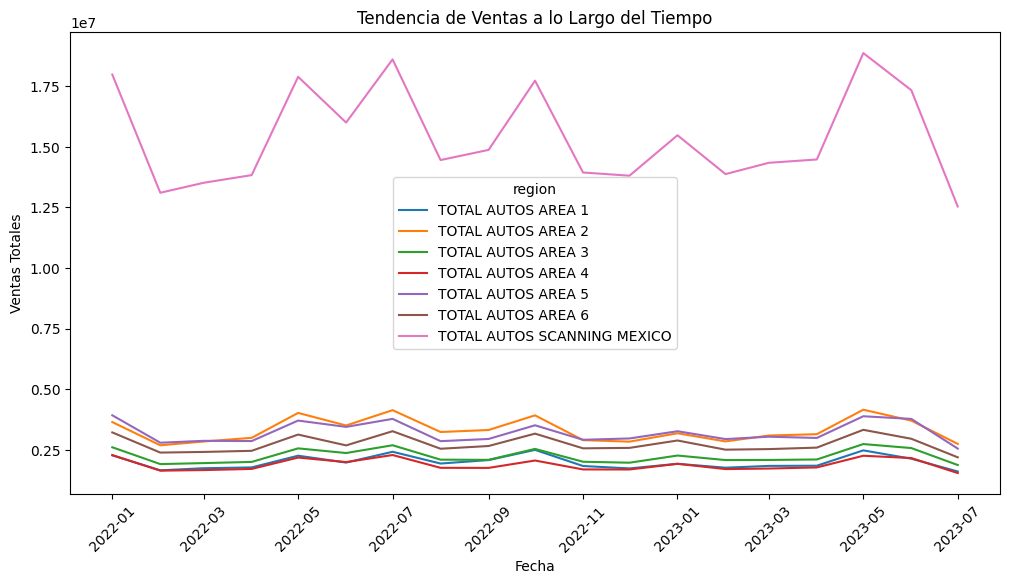

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de líneas de ventas totales a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_ventas', data=df, hue='region')
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

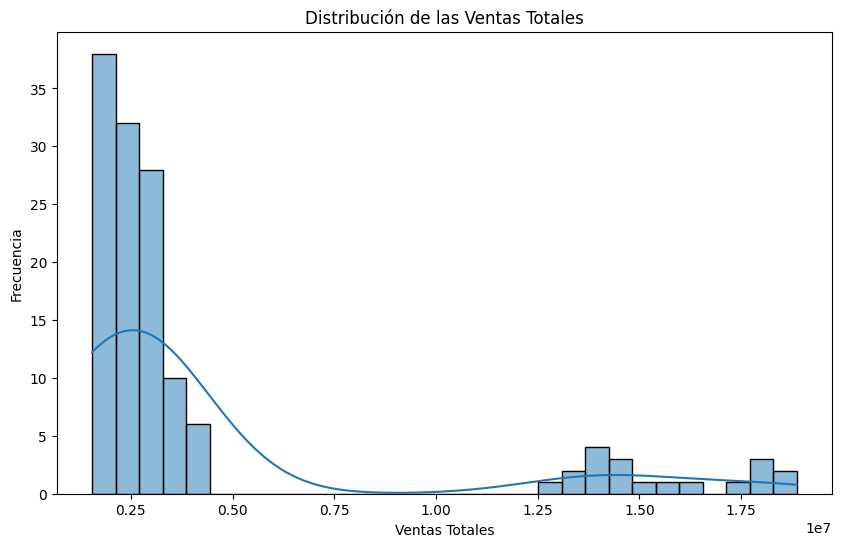

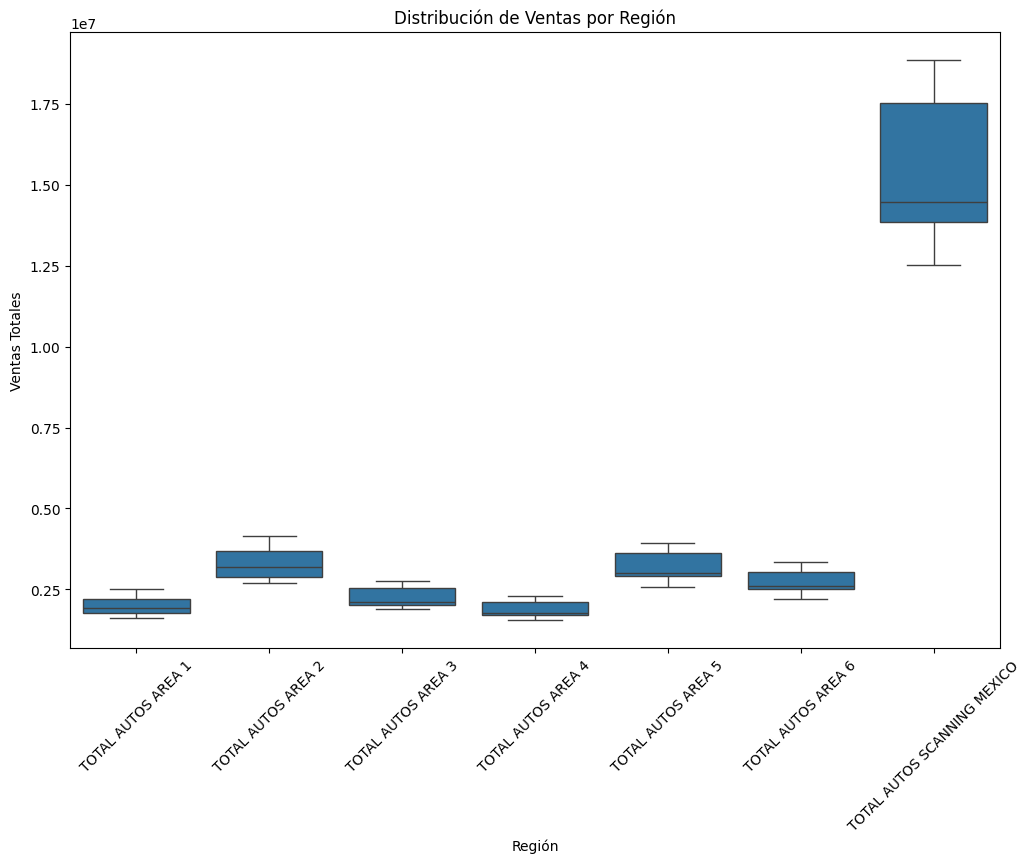

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de total_ventas
plt.figure(figsize=(10, 6))
sns.histplot(df['total_ventas'], bins=30, kde=True)
plt.title('Distribución de las Ventas Totales')
plt.xlabel('Ventas Totales')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de total_ventas por región
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='total_ventas', data=df)
plt.title('Distribución de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

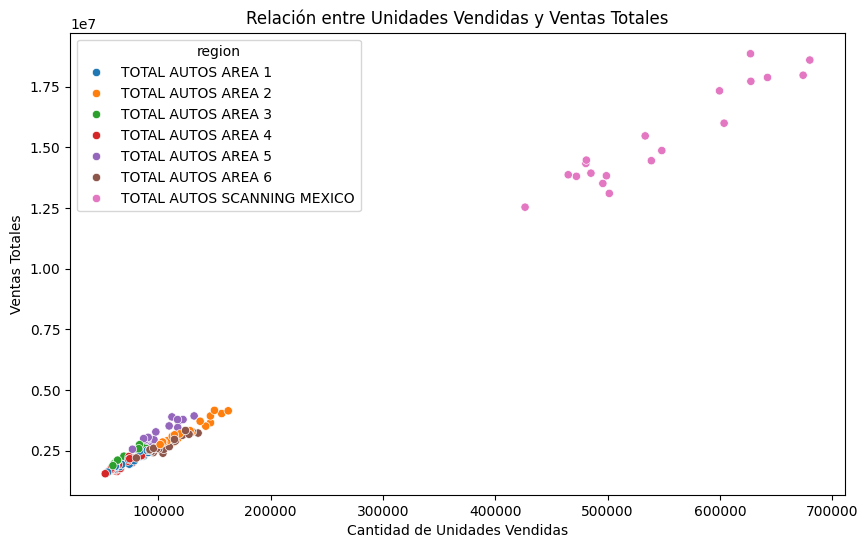

In [7]:
# Gráfico de dispersión entre cantidad_unidades_vendidas y total_ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cantidad_unidades_vendidas', y='total_ventas', data=df, hue='region')
plt.title('Relación entre Unidades Vendidas y Ventas Totales')
plt.xlabel('Cantidad de Unidades Vendidas')
plt.ylabel('Ventas Totales')
plt.show()

<Figure size 1200x600 with 0 Axes>

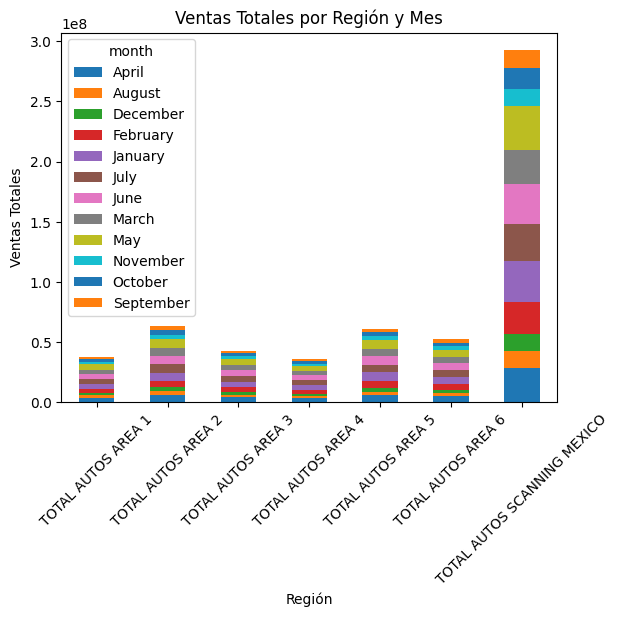

In [8]:
# Gráfico de barras apiladas de ventas por región
plt.figure(figsize=(12, 6))
df.groupby(['region', 'month'])['total_ventas'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Ventas Totales por Región y Mes')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

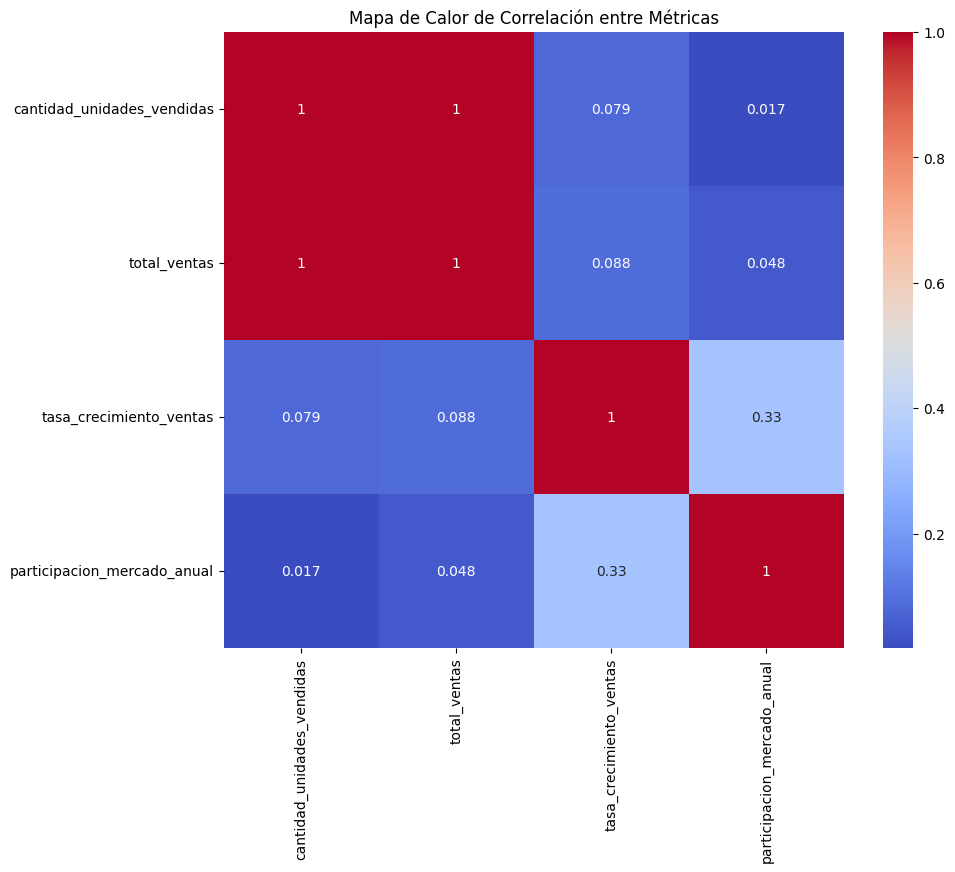

In [17]:
# 4. Mapa de Calor: Correlación entre diferentes métricas
plt.figure(figsize=(10, 8))
corr = df[['cantidad_unidades_vendidas', 'total_ventas', 'tasa_crecimiento_ventas', 'participacion_mercado_anual']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Métricas')
plt.show()

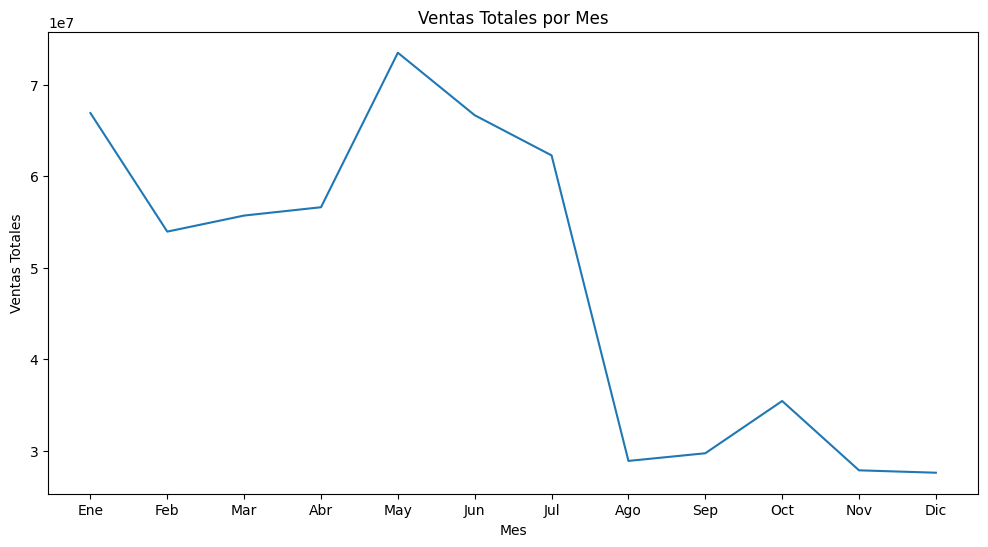

In [18]:
# 5. Gráfica de Líneas: Ventas totales por mes
plt.figure(figsize=(12, 6))
df['month'] = df['date'].dt.month
df_monthly = df.groupby('month')['total_ventas'].sum().reset_index()
sns.lineplot(x='month', y='total_ventas', data=df_monthly)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

<Figure size 1200x600 with 0 Axes>

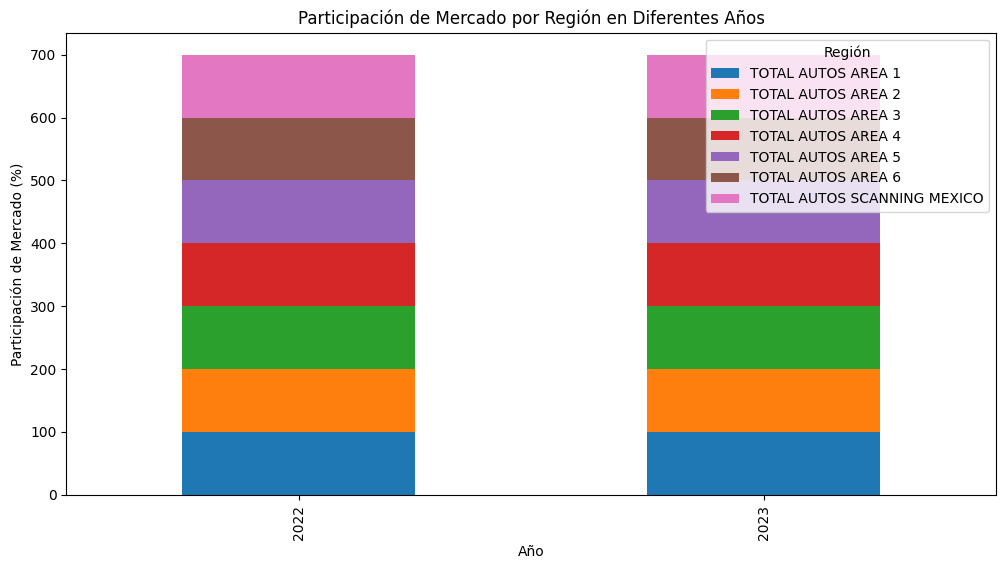

In [20]:
# Verificar si la columna 'participacion_mercado_anual' es numérica
if not pd.api.types.is_numeric_dtype(df['participacion_mercado_anual']):
    # Intentar convertir la columna a tipo numérico
    df['participacion_mercado_anual'] = pd.to_numeric(df['participacion_mercado_anual'], errors='coerce')

# Verificar si hay valores nulos después de la conversión
if df['participacion_mercado_anual'].isnull().any():
    print("Advertencia: Hay valores no numéricos en 'participacion_mercado_anual' que se han convertido a NaN.")

# 6. Gráfica de Barras Apiladas: Participación de mercado por región en diferentes años
plt.figure(figsize=(12, 6))
df['year'] = df['date'].dt.year

# Crear la tabla pivote
df_pivot_year = df.pivot_table(index='year', columns='region', values='participacion_mercado_anual', aggfunc='sum')

# Verificar si la tabla pivote tiene datos numéricos
if df_pivot_year.empty or not df_pivot_year.select_dtypes(include=['number']).any().any():
    print("Error: No hay datos numéricos para graficar.")
else:
    # Graficar la tabla pivote
    df_pivot_year.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Participación de Mercado por Región en Diferentes Años')
    plt.xlabel('Año')
    plt.ylabel('Participación de Mercado (%)')
    plt.legend(title='Región')
    plt.show()

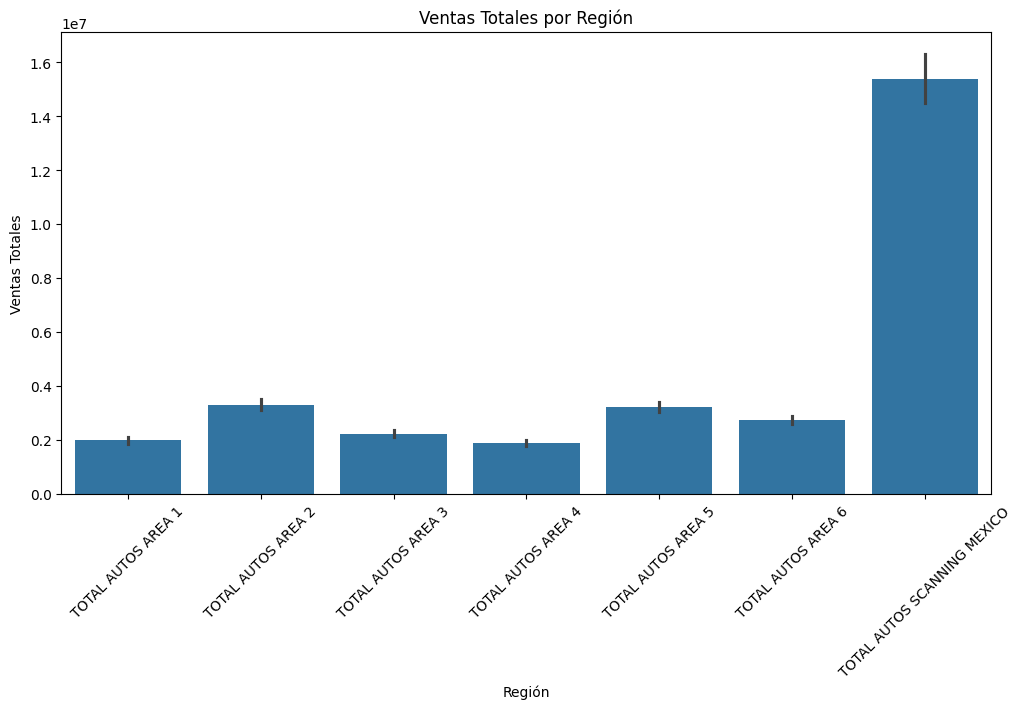

In [25]:
# Gráfica de Barras: Ventas totales por región
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='total_ventas', data=df)
plt.title('Ventas Totales por Región')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)  # Puedes ajustar el ángulo (45 grados en este caso)
plt.show()

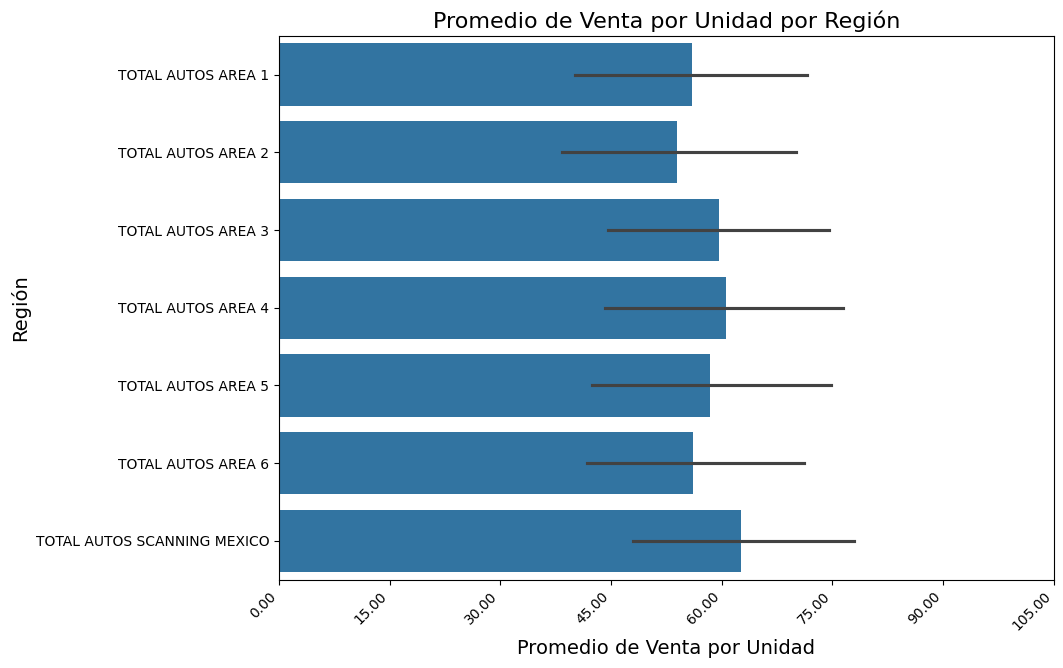

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura

# Crear la gráfica de barras horizontal
sns.barplot(x='promedio_venta_por_unidad', y='region', data=df, orient='h')

# Título y etiquetas de los ejes
plt.title('Promedio de Venta por Unidad por Región', fontsize=16)
plt.xlabel('Promedio de Venta por Unidad', fontsize=14)
plt.ylabel('Región', fontsize=14)

# Obtener los valores actuales del eje x
current_ticks = plt.xticks()[0]

# Seleccionar solo 8 valores equidistantes
num_ticks = 8
selected_ticks = current_ticks[::len(current_ticks) // num_ticks][:num_ticks]

# Establecer los nuevos ticks y etiquetas
plt.xticks(ticks=selected_ticks, labels=[f'{tick:.2f}' for tick in selected_ticks], rotation=45, ha='right', fontsize=10)

# Ajustar el margen inferior para que las etiquetas no se corten
plt.subplots_adjust(bottom=0.2)

# Mostrar la gráfica
plt.show()